# Gravitational Orbits Final Project
Solving the orbit equations, I consructed a plot of the orbit similar to the ones described in class, then I created an animation of the orbit. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
# Change the common font size
font_size = 14
plt.rcParams.update({'font.size': font_size})

In [3]:
class Orbit:
    """
    This class uses initial coniditions and Lagrange's equations for two bodies orbiting with gravity
    
    Parameters
    ----------
    m_1 : float
    m_2 : float
    G : float
    
    Methods
    -------
    dz_dt(t,z)
        Returns the right side of the diff eq in vector z
    """
    
    def __init__(self, m_1=1., m_2=1., G=1.):
        self.m_1 = m_1
        self.m_2 = m_2
        self.G = G
        
    def dz_dt(self, t, z):
        """
        This function returns the right-hand side of the diffeq: 
        [dz/dt d^2z/dt^2]
        
        Parameters
        ----------
        t : float
            time 
        z : float
            8-component vector with y[0] = x_1(t) & y[1] = x_dot_1(t) 
                                    y[2] = y_1(t) & y[3] = y_dot_1(t)
                                    y[4] = x_2(t) & y[5] = x_dot_2(t)
                                    y[6] = y_2(t) & y[7] = y_dot_2(t)
        
        Returns
        -------
        """
        r_12 = np.sqrt((z[0] - z[4])**2 + (z[2] - z[6])**2)
        
        return [z[1], self.G * self.m_2 * (z[4] - z[0]) / r_12**3, \
                z[3], self.G * self.m_2 * (z[6] - z[2]) / r_12**3, \
                z[5], -self.G * self.m_1 * (z[4] - z[0]) / r_12**3, \
                z[7], -self.G * self.m_1 * (z[6] - z[2]) / r_12**3, \
               ]
    
    def solve_ode(self, t_pts, z_0, abserr=1.0e-8, relerr=1.0e-8):
        
        """
        Solve the ODE given initial conditions.
        For now use odeint, but we have the option to switch.
        Specify smaller abserr and relerr to get more precision.
        """  
        solution = solve_ivp(self.dz_dt, (t_pts[0], t_pts[-1]), 
                             z_0, t_eval=t_pts, method='RK23', 
                             atol=abserr, rtol=relerr)
        x_1, x_dot_1, y_1, y_dot_1, x_2, x_dot_2, y_2, y_dot_2 = solution.y
                
        return x_1, x_dot_1, y_1, y_dot_1, x_2, x_dot_2, y_2, y_dot_2
    
#     def solve_ode_Leapfrog(self, t_pts, z_0):
#         """Solve ode with leapfrog method"""
#         delta_t = t_pts[1] - t_pts[0]
        
#         x_1_0, d_dot_1_0, y_1_0, y_dot_1_0, \
#                 x_2_0, x_dot_2_0, y_2_0, y_dot_2_0 = z_0
                
        
#         return (self.mu/2.) * r_dot**2 + self.Ueff(r)

In [4]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

In [5]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

# Orbit Plot

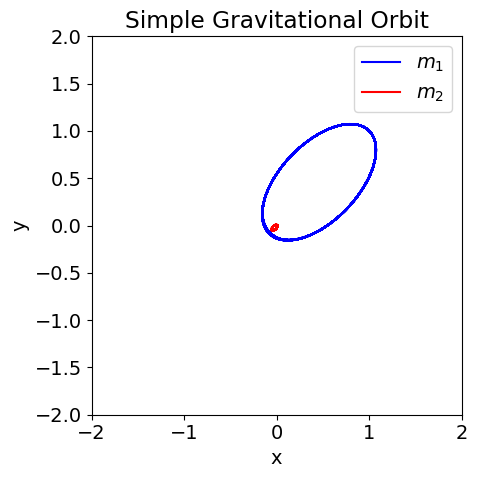

In [6]:
# Plotting time 
t_start = 0.
t_end = 50.
delta_t = 0.01

t_pts = np.arange(t_start, t_end+delta_t, delta_t) 

G = 1.
m_1 = 1.
m_2 = 20.

#instantiate orbits
o1 = Orbit(m_1, m_2, G)

#initial conditions
# x_1_0, x_dot_1_0, y_1_0, y_dot_1_0, x_2_0, x_dot_2_0, y_2_0, y_dot_2_0
x_1_0, x_dot_1_0 = 1., 1.
y_1_0, y_dot_1_0 = 1., -1.
x_2_0, x_dot_2_0 = -(m_1 / m_2) * x_1_0, -(m_1 / m_2) * x_dot_1_0 
y_2_0, y_dot_2_0 = -(m_1 / m_2) * y_1_0, -(m_1 / m_2) * y_dot_1_0 
# x_2_0, x_dot_2_0 = -1., 0.
# y_2_0, y_dot_2_0 = -1., 0.

z_0 = [x_1_0, x_dot_1_0, y_1_0, y_dot_1_0, x_2_0, x_dot_2_0, y_2_0, y_dot_2_0]
x_1, x_dot_1, y_1, y_dot_1, x_2, x_dot_2, y_2, y_dot_2 = o1.solve_ode(t_pts, z_0)

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)
ax.plot(x_1, y_1, color='blue', label=r'$m_1$')
ax.plot(x_2, y_2, color='red', label=r'$m_2$')
ax.set_title('Simple Gravitational Orbit')
ax.set_xlim(-2., 2.)
ax.set_ylim(-2., 2.)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()

fig.tight_layout()
fig.savefig('Gravational_Orbit_Final.png')

# Orbit Plot
The plot above has m2 set much larger than m1, and the initial conditions are set in a way that m2 is almost stationary. This mirrors what we discussed in class and is similar to the earth orbiting the sun, or the moon orbiting earth. However, this orbit is very elliptical. Due to the conservation of energy, m1 speeds up tremendously when it is near m2, then slows down considerably when it is further awway. This is demonstrated further in the animation. 

## Orbit Animation

In [7]:
from matplotlib import animation, rc
from IPython.display import HTML

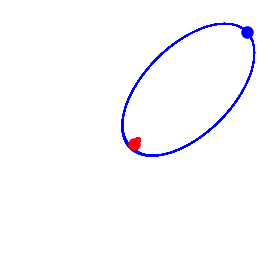

In [8]:
x_min = -1.2
x_max = -x_min
y_min = -1.2
y_max = -y_min

fig_anim = plt.figure(figsize=(5,3), num='Simple Gravitational Orbit')
ax_anim = fig_anim.add_subplot(1,1,1)
ax_anim.set_xlim(x_min, x_max)
ax_anim.set_ylim(y_min, y_max)

ln1_anim, = ax_anim.plot(x_1, y_1, color='blue', lw=1)
ln2_anim, = ax_anim.plot(x_2, y_2, color='red', lw=1)

pt1_anim, = ax_anim.plot(x_1[0], y_1[0], 'o', markersize=8, color='blue')
pt2_anim, = ax_anim.plot(x_2[0], y_2[0], 'o', markersize=8, color='red')

ax_anim.set_aspect(1)
ax_anim.axis('off')
fig_anim.tight_layout()

In [9]:
def animate_orbits(i):
    
    i_skip = i
    
    pt1_anim.set_data(x_1[i_skip], y_1[i_skip])
    pt2_anim.set_data(x_2[i_skip], y_2[i_skip])
    
    return (pt1_anim, pt2_anim)

In [10]:
frame_interval = 1.  # time between frames
frame_number = 1000    # number of frames to include (index of t_pts)
anim = animation.FuncAnimation(fig_anim, 
                               animate_orbits, 
                               init_func=None,
                               frames=frame_number, 
                               interval=frame_interval, 
                               blit=True,
                               repeat=False)

In [11]:
HTML(anim.to_jshtml())